# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

In [1]:
%run -i "smartcab/agent.py"


/-------------------------
| Training trial 1
\-------------------------

Simulating trial. . . 
Agent not set to learn.

/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -5.75)
Agent not enforced to meet deadline.

/-------------------
| Step 1 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -4.62)
Agent not enforced to meet deadline.

/-------------------
| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -4.28)
Agent not enforced to meet deadline.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -5.49)
Agent not enforced to meet deadline.

Simulation ended. . . 


In [1]:
%run -i "smartcab/agent.py"


/-------------------------
| Training trial 1
\-------------------------

Environment.reset(): Trial set up with start = (4, 2), destination = (2, 4), deadline = 20
Simulating trial. . . 
Agent not set to learn.

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (4, 2), heading: (0, -1), action: None, reward: 0.157733031145
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': None, 'deadline': 20, 't': 0, 'action': None, 'reward': 0.15773303114526538, 'waypoint': 'right'}
!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 0.16)
Agent not enforced to meet deadline.

/-------------------
| Step 1 Results
\-------------------

Environment.step(): t = 1
Environment.act() [POST]: location: (4, 2), heading: (0, -1), action: None, reward: 1.48762645718
Environment.act(): Step data: {'inputs': {'light

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

During all steps of the simulation the agent did not move. At green lights, the agent is negatively rewarded since it *should* move towards the destination when the light is green. And, as expect, the agent is rewarded positively at red lights since the agent should not move forward at these times.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

`agent.py` flags:

The `num_dummies` flag in `run()` sets the total number of dummy agents in the environment (defaults to 100).

The total number of vertically and horizontally spanning streets can be set using the `grid_size` flag in `run()`.

The agent's state can be described in greater/lesser detail by setting the `verbose` flag in `run()`. Information like the agent's current location and orientation in addition to the current environment from the agent's point of view can be captured by setting this flag to true.

`environment.py`:

The `Environment.act()` function is called when an agent performs an action.

`simulator.py`:

`Simulator.render_text()` is used to render the simulation using the terminal window or command prompt. It strictly has a text based output with no graphical implementation for the support user interface (UI). In contrast, `Simulation.render()` visualizes the the simulation in a 2D canvas using Pygame. The Pygame GUI implementation allows users to see the street map overhead with text-based state information at the top of the screen.

`planner.py`:

As observed on line 38 of `RoutePlanner.next_waypoint()`, the East-West direction is considered first: "`# Next check if destination is cardinally East or West of location`".

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


In [2]:
%run -i "smartcab/agent.py"


/-------------------------
| Training trial 1
\-------------------------

Simulating trial. . . 
Agent not set to learn.

/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.42)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 2.19)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -4.91)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint forward. (rewarded 1.34)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

!! Agent state not


/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.34)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 1.86)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 0.66)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded -0.14)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded -0.44)
16% of time remaining to rea

| Step 7 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.63)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 1.61)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 1.61)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.60)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.10)
60% of time remaining to reach destination.

/-------------------
| Step 12 Resu


/-------------------
| Step 19 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -5.81)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded -0.25)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.16)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.61)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red

\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded 1.70)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.73)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.08)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 0.89)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.23)
40% of time remaining to reach destination.

/-------------------
| Step 


Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 10
\-------------------------

Simulating trial. . . 
Agent not set to learn.

/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 2.83)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -5.52)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of right. (rewarded 1.30)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -9.58)
84% of time remaining to reach destination.

/-------------------
| Step 4 


/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 1.78)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -9.39)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 2.64)
37% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of forward. (rewarded 0.63)
33% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of right. (rewarded 0.80)
30% of time remaining to reach destination.

/-------------------
| Ste

| Step 27 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of right. (rewarded -0.50)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of right. (rewarded 0.54)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of right. (rewarded -0.74)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 13
\-------------------------

Simulating trial. . . 
Agent not set to learn.

/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.89)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

!! A

Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.55)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.18)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.99)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.17)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 1.06)
8% of time rema


/-------------------
| Step 15 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 1.33)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 2.05)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving right through traffic and cause a minor accident. (rewarded -20.60)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.69)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 1.78)
0% of time remaining to reach destina


/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.55)
32% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -4.66)
28% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of right. (rewarded 0.82)
24% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded -0.34)
20% of time remaining to reach destination.

/-------------------
| Step 20 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -10.14)
16% of time remaining to reach 

/-------------------
| Step 6 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of right. (rewarded 0.65)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.05)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -10.92)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of right. (rewarded -0.06)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint right. (rewarded 1.83)
56% of time remaining to reach destination.

/-------------


/-------------------
| Step 23 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of left. (rewarded -0.46)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.07)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Testing trial 2
\-------------------------

Simulating trial. . . 
Agent not set to learn.

/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.85)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.09)
92% of time remaining to reach destination.

/-------------------
| S


/-------------------
| Step 13 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of forward. (rewarded 0.61)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 0.72)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 0.88)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of right. (rewarded 0.53)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 1.30)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\---


/-------------------
| Step 4 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -4.01)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

!! Agent state not been updated!
Agent followed the waypoint left. (rewarded 1.39)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 1.47)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of forward. (rewarded 1.72)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

!! Agent state not been updated!
Agent drove right instead of left. (rewarded 0.42)
55% of time remaining to reach destination.

/-------------------
| Step 9


/-------------------------
| Testing trial 7
\-------------------------

Simulating trial. . . 
Agent not set to learn.

/-------------------
| Step 0 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.30)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

!! Agent state not been updated!
Agent drove left instead of right. (rewarded 1.51)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent idled at a green light with no oncoming traffic. (rewarded -5.20)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent drove forward instead of right. (rewarded 0.24)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------


/-------------------
| Step 1 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -9.02)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving forward through a red light. (rewarded -9.93)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.86)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

!! Agent state not been updated!
Agent attempted driving left through a red light. (rewarded -9.47)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

!! Agent state not been updated!
Agent properly idled at a red light. (rewarded 0.90)
70% o

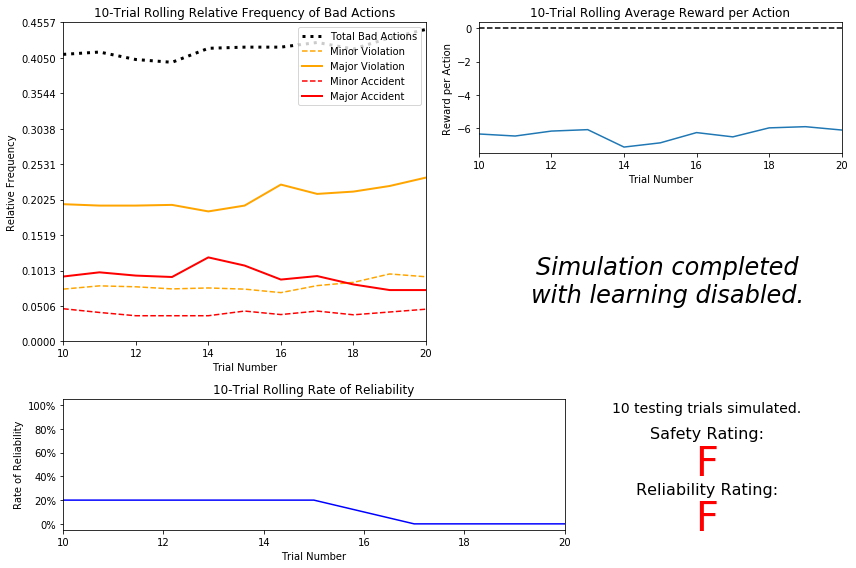

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

In [18]:
import pandas as pd

#testing rolling() method
df_test = pd.DataFrame([1,7,3,4,5])
df_test[0].rolling(window=2, center=False).mean()

0    NaN
1    4.0
2    5.0
3    3.5
4    4.5
Name: 0, dtype: float64

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

*How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*

Reviewing the graph with the 5 colored curves in the top left, we can see the total bad actions are represented by the black dotted line. This curve seems to exist on the interval of `Relative Frequency = [.4050, .4557]`. From this observation, we can conclude the agnet is making a bad decision roughly 40-46% of the time.

*Given that the agent is driving randomly, does the rate of reliability make sense?*

Since the agent is making driving decision randomly based off a 4 element decision list, it would make sense that the reliability rate for reaching the destination is low. Specifically, here we see that the 10 trial rolling rate of reliability is < 25%.

*What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*

The top right graph visualizes the rolling average reward per action. Seeing as this number is strictly negative, the rewards suggest the agent is often being penalized.

*As the number of trials increases, does the outcome of results change significantly?*

The outcome does not vary significantly (nor in a positive way) between trials. This makes sense seeing as how the agent is not currently making use of a learning implementation. With this, it make sense that, on average, the bad action frequency, reliability, and average reward should not fluctuate much with respect of what trial to another.

*Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

This SmartCab would clearly be considered unsafe and unrealiable based on the frequency of bad actions, rate of reliability, and average reward per action. This thought is confirmed by the bottom right visual, where the SmartCab receives both a Safety and Reliability rating of F.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

#### Relevant features for safety **and** efficiency

`light`
* Safety: Agents should not drive straight through red lights
* Efficiency: Agents should utilize green lights to drive straight when `waypoint` indicates the destination is in the straight direction

`oncoming`
* Safety: The agent needs to yield when trying to make a left turn if the oncoming traffic is driving straight.
* Efficiency: If the agent isn't able to make a left turn at it's current position, it will have to wait for the oncoming agent to drive by and reevaluate, go forward to the next light and attempt to make a left, or make 3 right turns.

`waypoint`
* Safety:
* Efficiency: The waypoint is responsible for guiding our agent, with respect to it's current position, towards the destination. However, without taking other variables in the environment into account, the waypoint alone has no impact on safety. However, it has a crucial impact on efficiency, seeing as how it points toward the destination.

`left`
* Safety: Assume agents places no importance on the light. If our agent wishes to go in any direction, the intent of the agent to the left will cause a collision with our agent (assuming neither wishes to stay where they are) for all situation except for when the left agent wishes to make a right turn.

    Now assume the agent places importance on the light. If our agent has a red light, the intent of the left agent does not matter. Additionally, if our agent has a green light, the left agent has a red light, and the only non-static action the left agent can take is to make a right turn, which will not affect our agent whatsoever.
    
    Therefore, when our agent is concerned with the light, the actions of the left agent do not matter with respect to safety. However, when the light is not taken into account, our agent should take extreme care with respect to the left agent's intent.
* Efficiency: The left agent's intent will be critical for understanding whether or not our agent can make a right turn on a red light. If there isn't a left agent or if the left agent doesn't wish to go forward on a red light, the local agent can safely make a right turn.

#### Disregarded features

`right`
* Safety: Assume agents place no importance on the light. Unless our agent wishes to make a right turn, the intent of the right agent is of great importance with respect to the safety of our agent (our agent needs to cross the intersection to go left or straight).

    Now assume the agent places importance on the light. If our agent's light is red, it will not move, and therefore the actions of right agents do not matter with respect to safety. However, if our agent's light is green, we could reach a conflict of interest where our agent wishes to go straight and the right agent wishes to make a right turn. However, because our agent has right of way, the right agent should yield and a collision should not occur.
    
    Therefore, when our agent is not taking the light into consideration, the intent of the right agent is of great importance with respect to safety. However, when our agent takes the light into account, the right agent's intent is not of a safety concern to our agent.
* Efficiency:

`deadline`
* Safety: If too high of a reward is placed on arriving to the destination by the deadline, or if greater rewards are placed on arriving to the destination very far ahead of the deadline, we could see safety concerns arise for our agent. For visualization, consider if the agent is offered a great reward for driving to a destination that is straight ahead, but the agent has a red light. Given enough incentive, the agent could blow through the red light regardless of the surrounding traffic.
* Efficiency: Our agent will place significant importance on reaching the destination by the deadline. Additionally, it makes sense to assume that our agent will receive some positive reward for reaching the destination prior to the deadline, where the least actions required to reach the destination yields the highest reward. It makes sense that the deadline should be taken into consideration for efficiency purposes when training the smart cab.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Below is a list of values for the discrete variables defined in the **Question 4** state space:

`light` = (Green, Red)(2)

`oncoming` = (Left, Straight, Right, None)(4)

`waypoint` = (Left, Straight, Right, None)(3) <<< There is a `return None` statement on line 36 in the planner.

`left` = (Left, Straight, Right, None)(4)

The size of the statespace is equal to the total number of combinations for all variable values. By multiplying the cardinality of each variable, we see the size of the statespace is

<center>|light| x |oncoming| x |waypoint| x |left|</center>
<center>= 2 x 4 x 3 x 4</center>
<center>= 96</center>

So the total number of states given the current featureset is 96. It seems possible that the driving agent could learn a policy with a large but reasonable number of trials (state space has a size close to 100, may need a sizable trial count).

#### Disregarded features

`right` = (Left, Straight, Right, None)(4)

`deadline` = (All non-negative integers)(countably infinite)

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

In [2]:
%run -i "smartcab/agent.py"


/-------------------------
| Training trial 1
\-------------------------

Simulating trial. . . 
Agent not set to learn.

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('red', 'left', 'right', 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -39.58)
Agent not enforced to meet deadline.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('red', 'left', 'right', None)
Agent attempted driving left through a red light. (rewarded -9.84)
Agent not enforced to meet deadline.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('red', 'left', 'right', None)
Agent followed the waypoint right. (rewarded 2.49)
Agent not enforced to meet deadline.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', None)
Agent attempted driving left through a red light. (rewarded -9.52)
Agent n

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [1]:
%run -i "smartcab/agent.py"


/-------------------------
| Training trial 1
\-------------------------

Simulating trial. . . 
epsilon = 0.9500; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('green', None, 'right', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.43)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('green', 'right', 'right', 'left')
Agent drove forward instead of right. (rewarded 0.26)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('green', None, 'right', 'forward')
Agent drove forward instead of right. (rewarded 0.27)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('green', None, 'right', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.37)
80% of time remaini


/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('red', 'forward', 'forward', None)
Agent attempted driving forward through a red light. (rewarded -9.15)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('red', 'left', 'forward', None)
Agent attempted driving left through a red light. (rewarded -9.90)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('green', 'left', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.27)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 3
\-------------------------

Simulating trial. . . 
epsilon = 0.8500; alpha = 0.5000

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('red', None, 'forward', 'left')
Agent attempted driving 

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('red', 'forward', 'left', None)
Agent drove right instead of left. (rewarded 0.82)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('green', 'forward', 'right', None)
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.67)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('red', None, 'right', 'right')
Agent attempted driving forward through a red light. (rewarded -9.73)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('red', 'left', 'right', None)
Agent properly idled at a red light. (rewarded 1.67)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('green',


/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('red', None, 'right', 'right')
Agent followed the waypoint right. (rewarded 1.76)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('green', None, 'right', 'right')
Agent followed the waypoint right. (rewarded 1.97)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('red', None, 'left', 'forward')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.96)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('red', None, 'left', None)
Agent attempted driving left through a red light. (rewarded -10.85)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state:


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('red', None, 'left', None)
Agent drove right instead of left. (rewarded 1.01)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('green', None, 'left', 'right')
Agent drove forward instead of left. (rewarded 1.80)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('red', 'left', 'forward', None)
Agent attempted driving forward through a red light. (rewarded -9.99)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('red', 'left', 'forward', None)
Agent attempted driving left through a red light. (rewarded -10.79)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('red', 'left', 'forward', 'forward')
Ag


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('green', None, 'right', None)
Agent drove forward instead of right. (rewarded 1.02)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('red', None, 'right', None)
Agent properly idled at a red light. (rewarded 0.04)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('green', None, 'right', None)
Agent drove forward instead of right. (rewarded 1.00)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('green', None, 'right', 'left')
Agent followed the waypoint right. (rewarded 1.07)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('green', 'left', 'forward', None)
Agent followed the waypoint forward. (

\-------------------

Agent previous state: ('red', None, 'forward', 'right')
Agent drove right instead of forward. (rewarded 1.31)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('green', None, 'left', None)
Agent drove forward instead of left. (rewarded 1.15)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('green', 'left', 'left', None)
Agent followed the waypoint left. (rewarded 1.67)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('green', None, 'right', None)
Agent drove forward instead of right. (rewarded 0.97)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('red', None, 'right', None)
Agent properly idled at a red light. (rewarded 0.39)
20% of time remaining to


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('green', None, 'left', None)
Agent followed the waypoint left. (rewarded 2.45)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 2.20)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('red', 'left', 'forward', 'forward')
Agent attempted driving right through traffic and cause a minor accident. (rewarded -19.43)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('green', 'left', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.81)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('red', 'left', 'forward'


/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 1.18)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('red', 'forward', 'forward', None)
Agent drove right instead of forward. (rewarded 1.30)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('red', 'right', 'left', 'left')
Agent properly idled at a red light. (rewarded 2.52)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('green', 'forward', 'left', 'left')
Agent idled at a green light with no oncoming traffic. (rewarded -4.92)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('green', None, 'left', 'right')
Agen

| Step 9 Results
\-------------------

Agent previous state: ('green', None, 'left', None)
Agent followed the waypoint left. (rewarded 1.37)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', 'left')
Agent properly idled at a red light. (rewarded 1.64)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', 'left')
Agent properly idled at a red light. (rewarded 0.61)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', 'right')
Agent attempted driving forward through a red light. (rewarded -10.09)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('green', 'forward', 'right', None)
Agent idled at a green li

Agent followed the waypoint forward. (rewarded 1.43)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 1.28)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('red', None, 'forward', 'right')
Agent drove right instead of forward. (rewarded 1.65)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('green', None, 'left', 'forward')
Agent drove forward instead of left. (rewarded 0.48)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('green', None, 'left', None)
Agent followed the waypoint left. (rewarded 1.62)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\---------------

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.04)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('green', None, 'left', None)
Agent followed the waypoint left. (rewarded 1.08)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('green', None, 'left', 'right')
Agent followed the waypoint left. (rewarded 2.12)
40% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('red', None, 'right', None)
Agent properly idled at a red light. (rewarded 0.03)
36% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('green', None, 'right', None)
Agent drove left instead of right. (rewarded 0.3


/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('green', 'left', 'left', None)
Agent followed the waypoint left. (rewarded 2.82)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 2.24)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 1.23)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('green', 'forward', 'left', 'right')
Agent drove forward instead of left. (rewarded 1.49)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('red', 'forward', 'left', None)
Agent properly idled at a red l

| Step 22 Results
\-------------------

Agent previous state: ('green', None, 'left', 'forward')
Agent drove forward instead of left. (rewarded 1.42)
34% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('red', 'forward', 'left', 'left')
Agent drove right instead of left. (rewarded 0.56)
31% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('green', None, 'right', 'left')
Agent followed the waypoint right. (rewarded 2.03)
29% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('green', 'forward', 'right', None)
Agent followed the waypoint right. (rewarded 1.12)
26% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 1


/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('green', None, 'left', None)
Agent followed the waypoint left. (rewarded 1.11)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('red', None, 'forward', 'left')
Agent properly idled at a red light. (rewarded 2.27)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 0.99)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('green', None, 'forward', 'forward')
Agent drove right instead of forward. (rewarded 0.11)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('green', None, 'left', None)
Agent followed the waypoint left. (re

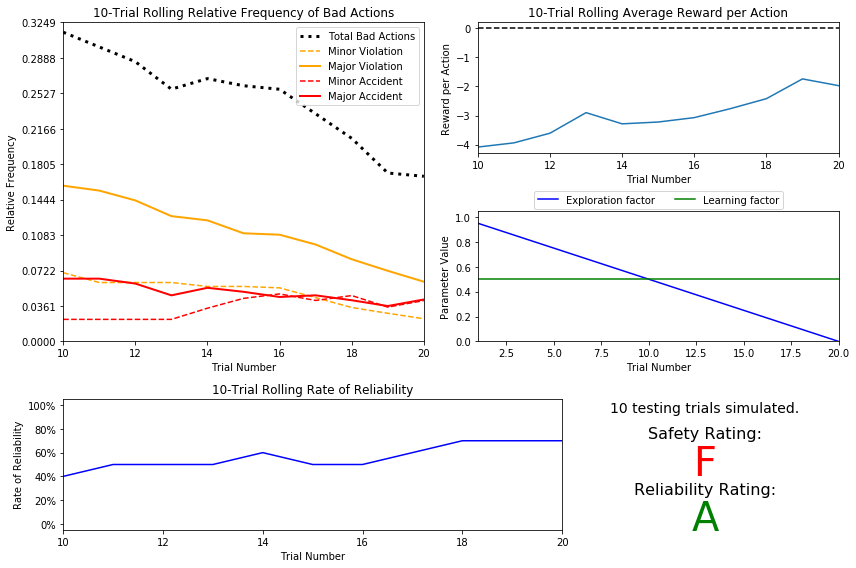

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

*Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*

Since the Q-Learning agent starts off knowing very little about how to handle different states, it makes sense that we see strong similarities early on in the visuals for bad actions, rate of reliability, and average rewards per action. The starting values for these 3 visuals are quite similar, but the Q-Learning agent improves performance away from these values as it begins to learn how to handle different states.

*Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*

Reading from the horizontal axis on the graphs, the agent required approximately 20 training trials prior to testing (seeing as how the graphs start at 10 and are calculating 10 trial rolling values). Given the linear epsilon decay function and reading from the exploration factor and learning rate vs. trial number graphs, this averages out to about 1 random action during learning per trial. Given that the default epsilon tolerance of 0.05 was used for this run, it makes sense that testing would start around the 20th trial.

*Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*

The linearly decaying function $\epsilon$<sub>t+1</sub> = $\epsilon$ - 0.05 is accurately represented in the parameters panel. With a y-intercept of .95 and an x-intercept of 20, the equation of the epsilon decay line is $\epsilon$ = -.0475t + .95, where t is the trial number.

*As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*

Looking at the top left 5 color graph, we clearly see that as the number of training trials increased, the number of total bad actions monotonically decreased. Additionally, each of the other 4 lines showed significant decreased. And, as we'd hope, the average reward per action graph (top right) shows (strictly) increasing behavior, indicating that our Q-Learning agent is rewarded more positively as the training trials go on.

*How does the safety and reliability rating compare to the initial driving agent?*

In comparison to the initial driving agent, the Q-Learning agent receives a substantially greater rating for reliability (A) with no better rating for safety (D).

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [2]:
%run -i "smartcab/agent.py"


/-------------------------
| Training trial 1
\-------------------------

Simulating trial. . . 
epsilon = 0.9500; alpha = 0.7500

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent drove right instead of forward. (rewarded 0.81)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('green', None, 'left', None)
Agent drove forward instead of left. (rewarded 1.41)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('red', 'left', 'left', None)
Agent attempted driving left through a red light. (rewarded -9.87)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('red', 'left', 'left', None)
Agent attempted driving forward through a red light. (rewarded -9.13)
80% of time remaining to reach destinati


/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('green', 'forward', 'right', None)
Agent idled at a green light with no oncoming traffic. (rewarded -5.26)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('green', 'left', 'right', None)
Agent followed the waypoint right. (rewarded 2.62)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('green', 'left', 'forward', None)
Agent idled at a green light with no oncoming traffic. (rewarded -4.45)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('green', None, 'forward', None)
Agent drove right instead of forward. (rewarded 1.90)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('red', 'left', 'left',


/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('red', None, 'right', None)
Agent followed the waypoint right. (rewarded 2.15)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('green', 'right', 'right', 'left')
Agent drove forward instead of right. (rewarded 0.89)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('red', None, 'right', None)
Agent properly idled at a red light. (rewarded 1.41)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('red', None, 'right', None)
Agent properly idled at a red light. (rewarded 1.48)
44% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('red', None, 'right', None)
Agent followed the waypoint right. (rewar

\-------------------

Agent previous state: ('red', None, 'forward', 'forward')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.66)
29% of time remaining to reach destination.

/-------------------
| Step 25 Results
\-------------------

Agent previous state: ('green', None, 'forward', None)
Agent drove left instead of forward. (rewarded 0.09)
26% of time remaining to reach destination.

/-------------------
| Step 26 Results
\-------------------

Agent previous state: ('red', None, 'right', 'forward')
Agent properly idled at a red light. (rewarded 0.72)
23% of time remaining to reach destination.

/-------------------
| Step 27 Results
\-------------------

Agent previous state: ('red', None, 'right', None)
Agent properly idled at a red light. (rewarded 0.16)
20% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('red', None, 'right', None)
Agent properly i

Agent previous state: ('green', None, 'left', 'left')
Agent drove right instead of left. (rewarded 0.75)
7% of time remaining to reach destination.

/-------------------
| Step 28 Results
\-------------------

Agent previous state: ('red', None, 'right', None)
Agent properly idled at a red light. (rewarded 0.92)
3% of time remaining to reach destination.

/-------------------
| Step 29 Results
\-------------------

Agent previous state: ('green', None, 'right', None)
Agent drove left instead of right. (rewarded -0.68)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 8
\-------------------------

Simulating trial. . . 
epsilon = 0.6634; alpha = 0.7500

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('green', None, 'left', 'right')
Agent idled at a green light with no oncoming traffic. (rewarded -5.30)
97% of time remaining to reach destination.

/---------------


Agent previous state: ('red', 'forward', 'left', None)
Agent properly idled at a red light. (rewarded 1.10)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('red', 'forward', 'left', None)
Agent properly idled at a red light. (rewarded 2.02)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('red', 'forward', 'left', None)
Agent properly idled at a red light. (rewarded 2.04)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('green', 'forward', 'left', None)
Agent attempted driving left through traffic and cause a minor accident. (rewarded -20.13)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('green', None, 'left', 'right')
Agent drove forward instead of left. (rewarded 1.14)

Agent previous state: ('green', 'right', 'left', None)
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.39)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('red', 'left', 'left', None)
Agent drove right instead of left. (rewarded -0.15)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', 'right')
Agent attempted driving forward through a red light. (rewarded -9.05)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('green', 'right', 'right', None)
Agent drove forward instead of right. (rewarded -0.39)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 11
\-------------------------

Simulating trial. . .

Agent previous state: ('red', None, 'right', 'left')
Agent followed the waypoint right. (rewarded 1.96)
97% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('red', 'forward', 'forward', None)
Agent drove right instead of forward. (rewarded 0.10)
94% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('green', 'right', 'left', 'right')
Agent drove right instead of left. (rewarded 0.67)
91% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('green', None, 'left', 'left')
Agent drove right instead of left. (rewarded 0.02)
89% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('green', 'left', 'right', None)
Agent drove left instead of right. (rewarded 1.87)
86% of time remaining to reach destination.



/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('red', 'left', 'forward', 'left')
Agent drove right instead of forward. (rewarded 1.04)
86% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('red', None, 'left', 'forward')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.58)
83% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.16)
80% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('red', None, 'left', 'right')
Agent attempted driving left through a red light. (rewarded -9.78)
77% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: 

| Step 2 Results
\-------------------

Agent previous state: ('red', None, 'right', None)
Agent followed the waypoint right. (rewarded 1.04)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('green', 'forward', 'right', 'right')
Agent followed the waypoint right. (rewarded 1.09)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 2.50)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('green', None, 'forward', None)
Agent drove left instead of forward. (rewarded 0.31)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', None)
Agent followed the waypoint right. (rewarded 2.77)
72% of

Agent previous state: ('red', 'left', 'left', 'forward')
Agent attempted driving forward through a red light with traffic and cause a major accident. (rewarded -40.21)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('green', 'left', 'left', None)
Agent drove right instead of left. (rewarded 0.39)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('green', 'left', 'left', 'forward')
Agent followed the waypoint left. (rewarded 2.08)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('red', None, 'left', None)
Agent drove right instead of left. (rewarded 0.33)
5% of time remaining to reach destination.

/-------------------
| Step 19 Results
\-------------------

Agent previous state: ('red', None, 'right', None)
Agent attempted driving forward through a r

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 1.95)
50% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 1.24)
47% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('green', 'left', 'forward', None)
Agent drove right instead of forward. (rewarded 0.72)
43% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('red', None, 'left', 'left')
Agent drove right instead of left. (rewarded 0.89)
40% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('green', 'left', 'right', 'left')
Agent drove forward instead of


Agent previous state: ('red', 'left', 'forward', None)
Agent drove right instead of forward. (rewarded -0.20)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('red', None, 'left', None)
Agent attempted driving forward through a red light. (rewarded -9.53)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('green', None, 'left', None)
Agent followed the waypoint left. (rewarded 2.02)
15% of time remaining to reach destination.

/-------------------
| Step 17 Results
\-------------------

Agent previous state: ('red', None, 'left', 'forward')
Agent properly idled at a red light. (rewarded 1.38)
10% of time remaining to reach destination.

/-------------------
| Step 18 Results
\-------------------

Agent previous state: ('red', None, 'left', 'left')
Agent drove right instead of left. (rewarded 0.11)
5% of time remaining to reach de


/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('red', 'left', 'left', None)
Agent properly idled at a red light. (rewarded 1.99)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('red', 'left', 'left', None)
Agent drove right instead of left. (rewarded 0.13)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('red', 'left', 'right', None)
Agent followed the waypoint right. (rewarded 2.77)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('green', None, 'right', 'left')
Agent drove forward instead of right. (rewarded 0.17)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('green', None, 'right', 'right')
Agent drove left instead of right. (reward


Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 27
\-------------------------

Simulating trial. . . 
epsilon = 0.2503; alpha = 0.7500

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', 'left')
Agent properly idled at a red light. (rewarded 0.67)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', None)
Agent followed the waypoint right. (rewarded 2.96)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 2.95)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 2.78)
84% of time r

Agent previous state: ('red', None, 'right', 'forward')
Agent properly idled at a red light. (rewarded 1.51)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', 'left')
Agent properly idled at a red light. (rewarded 0.39)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', None)
Agent followed the waypoint right. (rewarded 1.45)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('red', 'forward', 'forward', None)
Agent properly idled at a red light. (rewarded 1.53)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('red', 'left', 'forward', None)
Agent properly idled at a red light. (rewarded 1.92)
80% of time remaining to reach des

\-------------------

Agent previous state: ('red', 'forward', 'right', None)
Agent followed the waypoint right. (rewarded 1.88)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('red', 'right', 'forward', None)
Agent attempted driving forward through a red light. (rewarded -9.07)
0% of time remaining to reach destination.

Trial Aborted!
Agent did not reach the destination.

/-------------------------
| Training trial 31
\-------------------------

Simulating trial. . . 
epsilon = 0.2039; alpha = 0.7500

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('red', 'forward', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.57)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('red', 'forward', 'forward', 'right')
Agent attempted driving forward through a red light. (rewarded -9.12)

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', None)
Agent followed the waypoint right. (rewarded 1.80)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('green', None, 'forward', 'forward')
Agent followed the waypoint forward. (rewarded 0.92)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('green', None, 'left', None)
Agent drove forward instead of left. (rewarded 1.48)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('red', None, 'left', None)
Agent properly idled at a red light. (rewarded 2.10)
48% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('green', None, 'left', None)
Agent followed the waypoint left. (r


/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 2.65)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 2.05)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent attempted driving forward through a red light. (rewarded -9.77)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('green', None, 'forward', None)
Agent drove right instead of forward. (rewarded 0.30)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('red', None, 'left', None)
Agent properly idled at


Agent previous state: ('red', 'right', 'left', 'forward')
Agent attempted driving left through a red light with traffic and cause a major accident. (rewarded -40.34)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('green', 'forward', 'left', None)
Agent drove right instead of left. (rewarded 1.91)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('green', 'forward', 'forward', 'left')
Agent followed the waypoint forward. (rewarded 1.32)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('green', 'right', 'forward', None)
Agent drove right instead of forward. (rewarded 1.05)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('red', None, 'left', None)
Agent properly idled at a re


/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('red', 'left', 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.55)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('green', 'left', 'left', None)
Agent followed the waypoint left. (rewarded 0.87)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('red', 'left', 'forward', None)
Agent properly idled at a red light. (rewarded 2.28)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('green', 'left', 'forward', None)
Agent followed the waypoint forward. (rewarded 0.89)
52% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('green', None, 'right', 'forward')
Agent drove forward instea

Agent previous state: ('green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 2.41)
52% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 44
\-------------------------

Simulating trial. . . 
epsilon = 0.1047; alpha = 0.7500

/-------------------
| Step 0 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', 'right')
Agent properly idled at a red light. (rewarded 1.59)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', None)
Agent followed the waypoint right. (rewarded 1.40)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('red', 'left', 'right', 'right')
Agent followed the waypoint right. (rewarded 1.25)
88% of time remaining to reach destination.

/-------------------
| St


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('red', 'forward', 'forward', None)
Agent drove right instead of forward. (rewarded 0.22)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('green', 'left', 'left', 'left')
Agent followed the waypoint left. (rewarded 1.48)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('red', None, 'forward', 'left')
Agent properly idled at a red light. (rewarded 1.30)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('green', 'forward', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.35)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('red', None, 'right', None)
Agent followed the waypoint r

\-------------------

Agent previous state: ('red', None, 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.34)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('red', 'forward', 'forward', 'left')
Agent drove right instead of forward. (rewarded 0.36)
72% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('red', None, 'left', 'forward')
Agent properly idled at a red light. (rewarded 2.78)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('red', None, 'left', 'right')
Agent properly idled at a red light. (rewarded 2.73)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('green', None, 'left', 'right')
Agent drove forward instead of left. (rewarded 1.54)
60% of time

Agent previous state: ('red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.09)
30% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('red', None, 'left', None)
Agent properly idled at a red light. (rewarded 2.23)
27% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('green', None, 'left', None)
Agent followed the waypoint left. (rewarded 1.80)
23% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 1.16)
20% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('red', None, 'forward', 'right')
Agent properly idled at a red light. (rewarded 2.23)
17% of time remaining to reach destination.

/-------


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('red', None, 'left', None)
Agent properly idled at a red light. (rewarded 1.75)
90% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('green', None, 'left', None)
Agent followed the waypoint left. (rewarded 1.24)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 1.76)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('red', None, 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.15)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('red', 'right', 'forward', None)
Agent drove right instead of forward. (


Agent previous state: ('green', 'forward', 'left', None)
Agent drove right instead of left. (rewarded 0.67)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('green', 'left', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.13)
73% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('red', None, 'forward', 'right')
Agent properly idled at a red light. (rewarded 1.90)
70% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('red', 'right', 'forward', 'left')
Agent drove right instead of forward. (rewarded 0.35)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('red', None, 'left', 'left')
Agent drove right instead of left. (rewarded 1.51)
63% of time remaining to reach desti

Agent previous state: ('red', 'left', 'left', None)
Agent properly idled at a red light. (rewarded 2.87)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('green', 'left', 'left', 'right')
Agent drove right instead of left. (rewarded 1.77)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('green', None, 'right', None)
Agent followed the waypoint right. (rewarded 1.73)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('green', 'left', 'right', None)
Agent followed the waypoint right. (rewarded 1.84)
53% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('green', None, 'right', None)
Agent followed the waypoint right. (rewarded 2.24)
50% of time remaining to reach destination.

/---

Agent previous state: ('red', 'left', 'right', None)
Agent followed the waypoint right. (rewarded 0.72)
35% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('red', None, 'right', 'forward')
Agent properly idled at a red light. (rewarded 0.43)
30% of time remaining to reach destination.

/-------------------
| Step 14 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', 'left')
Agent properly idled at a red light. (rewarded 0.22)
25% of time remaining to reach destination.

/-------------------
| Step 15 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', 'left')
Agent properly idled at a red light. (rewarded 0.86)
20% of time remaining to reach destination.

/-------------------
| Step 16 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', 'left')
Agent properly idled at a red light. (rewarded 0.18)
15% of time remaining to reach


/-------------------
| Step 20 Results
\-------------------

Agent previous state: ('red', 'left', 'forward', None)
Agent properly idled at a red light. (rewarded 1.29)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('green', 'left', 'forward', 'forward')
Agent drove right instead of forward. (rewarded -0.42)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('green', None, 'left', None)
Agent drove right instead of left. (rewarded -0.14)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('red', 'left', 'right', 'right')
Agent followed the waypoint right. (rewarded 0.68)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('green', None, 'right', None)
Agent followed the waypoint

\-------------------

Agent previous state: ('green', 'right', 'left', 'left')
Agent attempted driving left through traffic and cause a minor accident. (rewarded -19.67)
68% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('green', None, 'left', 'left')
Agent drove right instead of left. (rewarded 1.78)
64% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('green', None, 'right', 'forward')
Agent drove forward instead of right. (rewarded 1.46)
60% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('red', 'left', 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.20)
56% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('green', 'left', 'forward', None)
Agent followed the wa


Agent previous state: ('red', 'left', 'forward', None)
Agent properly idled at a red light. (rewarded 2.79)
87% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('red', 'left', 'forward', 'right')
Agent properly idled at a red light. (rewarded 1.15)
83% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('green', 'left', 'forward', None)
Agent followed the waypoint forward. (rewarded 2.61)
80% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 1.12)
77% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('green', None, 'forward', 'forward')
Agent followed the waypoint forward. (rewarded 1.45)
73% of time remaining to reach 

Agent previous state: ('green', None, 'forward', 'left')
Agent followed the waypoint forward. (rewarded 1.70)
16% of time remaining to reach destination.

/-------------------
| Step 21 Results
\-------------------

Agent previous state: ('green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 2.22)
12% of time remaining to reach destination.

/-------------------
| Step 22 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 1.84)
8% of time remaining to reach destination.

/-------------------
| Step 23 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 2.14)
4% of time remaining to reach destination.

/-------------------
| Step 24 Results
\-------------------

Agent previous state: ('red', None, 'forward', 'forward')
Agent properly idled at a red light. (rewarded 1.68)
0% of time remaining to reach destina


/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 2.14)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 1.66)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 1.79)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('green', 'forward', 'forward', 'left')
Agent followed the waypoint forward. (rewarded 2.30)
45% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 72
\-------------------------

Simulating trial. .


/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', None)
Agent followed the waypoint right. (rewarded 1.98)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('green', None, 'right', 'forward')
Agent drove forward instead of right. (rewarded 1.79)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('red', None, 'right', None)
Agent followed the waypoint right. (rewarded 2.01)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('red', None, 'forward', 'right')
Agent properly idled at a red light. (rewarded 2.58)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('red', None, 'forward', 'right')
Agent properly idled at a red l

Agent previous state: ('red', 'left', 'forward', None)
Agent properly idled at a red light. (rewarded 1.05)
67% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('green', 'left', 'forward', None)
Agent drove left instead of forward. (rewarded 1.16)
63% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('green', None, 'right', None)
Agent followed the waypoint right. (rewarded 0.95)
60% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('green', 'left', 'right', 'forward')
Agent drove left instead of right. (rewarded 0.51)
57% of time remaining to reach destination.

/-------------------
| Step 13 Results
\-------------------

Agent previous state: ('green', 'forward', 'right', None)
Agent followed the waypoint right. (rewarded 2.33)
53% of time remaining to reach des

\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 2.18)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('green', 'forward', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.58)
50% of time remaining to reach destination.

/-------------------
| Step 10 Results
\-------------------

Agent previous state: ('green', None, 'forward', None)
Agent followed the waypoint forward. (rewarded 2.43)
45% of time remaining to reach destination.

/-------------------
| Step 11 Results
\-------------------

Agent previous state: ('red', None, 'right', None)
Agent followed the waypoint right. (rewarded 1.94)
40% of time remaining to reach destination.

/-------------------
| Step 12 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent properly idled at a red light. (rewarded 2.62)
35% of time remainin


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', 'left')
Agent properly idled at a red light. (rewarded 1.06)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('green', 'forward', 'right', None)
Agent followed the waypoint right. (rewarded 1.25)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('green', 'forward', 'right', None)
Agent followed the waypoint right. (rewarded 2.22)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('red', None, 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.43)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('red', None, 'forward', None)
Agent properly idled at a 

Agent previous state: ('red', None, 'right', None)
Agent followed the waypoint right. (rewarded 2.11)
95% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('green', None, 'right', 'forward')
Agent drove forward instead of right. (rewarded 0.58)
90% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('green', None, 'right', 'forward')
Agent drove forward instead of right. (rewarded 1.78)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('red', 'left', 'right', None)
Agent followed the waypoint right. (rewarded 2.00)
80% of time remaining to reach destination.

Trial Completed!
Agent reached the destination.

/-------------------------
| Training trial 86
\-------------------------

Simulating trial. . . 
epsilon = 0.0121; alpha = 0.7500

/-------------------
| Step 0

Agent previous state: ('green', 'right', 'forward', None)
Agent drove right instead of forward. (rewarded 0.92)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('green', None, 'left', None)
Agent followed the waypoint left. (rewarded 0.93)
65% of time remaining to reach destination.

/-------------------
| Step 7 Results
\-------------------

Agent previous state: ('green', 'right', 'left', None)
Agent drove right instead of left. (rewarded 1.14)
60% of time remaining to reach destination.

/-------------------
| Step 8 Results
\-------------------

Agent previous state: ('green', None, 'forward', 'forward')
Agent followed the waypoint forward. (rewarded 0.85)
55% of time remaining to reach destination.

/-------------------
| Step 9 Results
\-------------------

Agent previous state: ('red', None, 'forward', 'forward')
Agent properly idled at a red light. (rewarded 2.08)
50% of time remaining to reach desti

Agent previous state: ('red', 'left', 'left', None)
Agent properly idled at a red light. (rewarded 1.25)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('green', 'left', 'left', None)
Agent followed the waypoint left. (rewarded 2.81)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('green', 'left', 'forward', None)
Agent followed the waypoint forward. (rewarded 1.60)
80% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('red', 'forward', 'right', 'forward')
Agent properly idled at a red light. (rewarded 0.16)
76% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('red', 'right', 'right', None)
Agent followed the waypoint right. (rewarded 1.42)
72% of time remaining to reach destination

Agent previous state: ('green', 'right', 'left', 'forward')
Agent drove forward instead of left. (rewarded 1.84)
96% of time remaining to reach destination.

/-------------------
| Step 1 Results
\-------------------

Agent previous state: ('red', 'left', 'left', 'right')
Agent properly idled at a red light. (rewarded 2.74)
92% of time remaining to reach destination.

/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('red', 'left', 'left', None)
Agent properly idled at a red light. (rewarded 1.92)
88% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('red', 'left', 'left', None)
Agent properly idled at a red light. (rewarded 2.66)
84% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('red', 'left', 'left', 'left')
Agent properly idled at a red light. (rewarded 1.39)
80% of time remaining to reach destination


/-------------------
| Step 2 Results
\-------------------

Agent previous state: ('red', 'left', 'forward', None)
Agent properly idled at a red light. (rewarded 1.94)
85% of time remaining to reach destination.

/-------------------
| Step 3 Results
\-------------------

Agent previous state: ('red', 'left', 'forward', None)
Agent properly idled at a red light. (rewarded 2.89)
80% of time remaining to reach destination.

/-------------------
| Step 4 Results
\-------------------

Agent previous state: ('red', 'left', 'forward', None)
Agent properly idled at a red light. (rewarded 1.84)
75% of time remaining to reach destination.

/-------------------
| Step 5 Results
\-------------------

Agent previous state: ('red', 'left', 'forward', None)
Agent properly idled at a red light. (rewarded 0.92)
70% of time remaining to reach destination.

/-------------------
| Step 6 Results
\-------------------

Agent previous state: ('green', 'left', 'forward', None)
Agent followed the waypoint fo

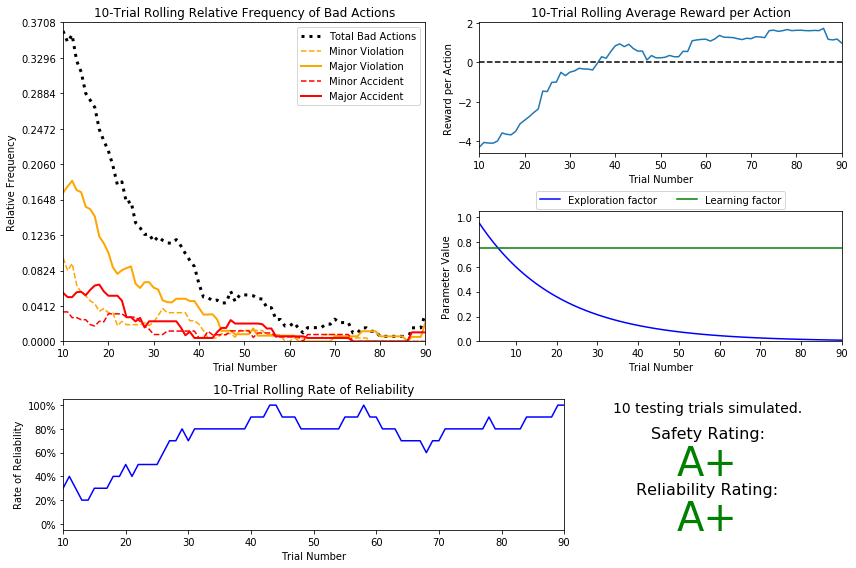

In [1]:
import visuals as vs
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')#tolerance = .01, epsilon *= .9

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

*What decaying function was used for epsilon (the exploration factor)?*

For this optimized implementation, $\epsilon = a^t$ was used, where a=.95.

*Approximately how many training trials were needed for your agent before begining testing?*

Approximately 90 training trials were required.

*What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*

The epsilon-tolerance was decreased to a value of .01 and the alpha (learning rate) was increased to .75. I attempted increasing the learning rate because I had increased the size of the (corrected) state space, and in doing so modified the epsilon decay function to increase training trial count. After attempting the modifications with an alpha of .5, I tried increasing the learning rate in an attempt to increase reliability (B) because safety already had an A+.

*How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*

Comparing the optimized Q-Learner to the previous version, this learner substantially increases safety (F->A+) while simultaneously increasing the reliability rating (A->A+). However, because this result was achieved by decreasing the epsilon-tolerance by 80% (0.05->0.01), we have significantly increased training time.

*Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*

Yes, seeing as how both safety and reliability rating has maximal values.

*Are you satisfied with the afety and reliability ratings of the Smartcab?*

Yes.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:**

(1) The optimal policy for the smartcab in the given environment is as follows:
    * Red lights
        * If the agent's waypoint indicates the destination is to the right
            * Wait at the red light until the left foreign agent of the intersection does not intend to go straight
        * Else
            * Wait for the light to turn green
    * Green lights
        * If the agent's waypoint indicates the destination is to the left
            * Wait at the green light until the oncoming foreign agent of the intersection does not intend to go forward or right
        * Else
            * Drive through the intersection forward or to the right
---

(2) There are several states that have a suboptimal policy. Here are a few:
    (light, oncoming, waypoint, left)
    
    ('green', None, 'right', 'right') << agent should go right
    -- None : 0.00
    -- forward : 0.00
    -- right : 0.43
    -- left : 0.88
    
    ('green', 'left', 'right', 'forward') << agent should go right
    -- None : 0.00
    -- forward : 0.00
    -- right : 0.00
    -- left : 0.71
    
    ('green', 'right', 'left', 'forward') << agent should go left
    -- None : -3.37
    -- forward : 0.45
    -- right : 0.00
    -- left : 0.00
---
     
(3) Examples demonstrating the Q-Learner partially learned the optimal policy

    (light, oncoming, waypoint)
    
    * Does not go forward or left through red lights

        ('red', 'left', 'left', 'left')
        -- None : 2.44
        -- forward : 0.00
        -- right : 0.54
        -- left : 0.00
         
        ('red', 'right', 'forward', 'forward')
        -- None : 0.25
        -- forward : 0.00
        -- right : -15.00
        -- left : 0.00
         
    * Goes straight and right through green lights
    
        ('green', 'right', 'forward', 'right')
        -- None : 0.00
        -- forward : 0.45
        -- right : 0.00
        -- left : 0.00
        
        ('green', 'left', 'right', 'right')
        -- None : 0.00
        -- forward : 0.00
        -- right : 1.63
        -- left : 0.00
         
---

(4)

(light, oncoming, waypoint)
 
('green', None, 'right', 'forward')
-- None : -4.66
-- forward : 0.45
-- right : 0.00
-- left : 0.00
 
In this example, we see the Q-Learner agent wishes to make a right turn on a green light with no oncoming traffic. The agent should be free to go right, but the highest Q-Value corresponds to going forward through the light. This could have occurred if the agent received the state several times early on in the learning process when most of the Q-Values were initialized to 0. If the Q-Values were 0 for both right and forward, the Q-Learner could still receive positive reward for going straight through the light (assuming the destination is in both the forward and right direction). Thus, based on the tie-breaker mechanic for `LearningAgent.choose_action()`, it's possible that forward was returned instead of forward.

Additionally, early learning allows random actions to be chosen, so it's possible that forward and left could have been chosen randomly early on when $\epsilon$ wasn't greatly decayed.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.